## Overview

This is an example of using TRIQS with the CTHYB solver to solver a square Hubbard model with 2x2 cluster DMFT in the basis of Nambu spinors, allowing for superconducting order. Since there are 4 sites and two spins that mix in the superconducting case, the impurity problem is 8x8 and therefore is too expensive to be solved on one core on a laptop.

This example uses Triqs 3.0

At each iteration, the impurity G0(iw) is changed from the site basis to a basis where are four 1x1 and two 2x2 blocks. After the solver is run, the self energy is symmetrized and then changed back to the site basis to be plugged back into the lattice. 

We force the normal part to have $D_4$ symmetry and the anomalous part to have $d_{x^2-y^2}$ symmetry



## Introduction

For our 4 site cluster, the creation operators can be written as a the 4 vector:
${\bf c}^\dagger_{k\sigma} = (c^\dagger_{k \sigma 0}, c^\dagger_{k \sigma 1}, c^\dagger_{k \sigma 2}, c^\dagger_{k \sigma 3})^T$

The Nambu spinors are defined as: 

${\bf \psi}_k = 
\left( \begin{matrix} {\bf c}_{k\uparrow} \\ {\bf c}^\dagger_{-k\downarrow} \end{matrix} \right) $

${\bf \psi}^\dagger_k = (\begin{matrix} {\bf c}^\dagger_{k\uparrow} && {\bf c}_{-k\downarrow} \end{matrix})$

The Green's function in the Nambu basis is:

$\mathcal{G}_k(\tau) = - \langle T_\tau \psi_k(\tau) \psi_k^\dagger(0) \rangle 
 = \left( \begin{matrix} G_{k\uparrow}(\tau) && F_{k\uparrow}(\tau) 
    \\ F^*_{k \uparrow}(\tau) && -G_{-k \downarrow}(-\tau) \end{matrix} \right)$
    
where $ G_{k\uparrow}(\tau) = - \langle T_\tau {\bf c}_{k \uparrow}(\tau) {\bf c}_{k \uparrow}^\dagger(0) \rangle $ is the normal Green's function

and $ F_{k\uparrow}(\tau) = - \langle T_\tau {\bf c}_{k \uparrow}(\tau) {\bf c}_{-k \downarrow}(0) \rangle $ is the anomalous Green's function. 

Fourier Transforming the Nambu Green's function gives:

$\mathcal{G}_k(i\omega_n)  = \left( \begin{matrix} G_{k\uparrow}(i \omega_n) && F_{k\uparrow}(i\omega_n) 
    \\ F^*_{k \uparrow}(-i\omega_n) && -G_{-k \downarrow}(-i\omega_n) \end{matrix} \right)$
    
Assuming that $F^*_{k \uparrow}(-i\omega_n) = F_{k\uparrow}(i\omega_n)$, we find a noninteracting Green's function of:

$\left[ \mathcal{G}^0_k(i\omega_n) \right]^{-1} = \left( \begin{matrix} i \omega_n - \varepsilon_k && 0 \\ 0 && i \omega_n + \varepsilon_k^T \end{matrix} \right) $

and a self energy of the form:

$\mathcal{\hat \Sigma}(i \omega_n) =  \left( \begin{matrix} \Sigma(i\omega_n) && S(i\omega_n) \\ S(i\omega_n) && -\Sigma^*(i\omega_n) \end{matrix} \right) $

where $\Sigma(i\omega_n)$ is the normal self energy and $S(i\omega_n)$ is the anomalous self energy

The anomalous Green's function and self energy are 0 in the normal state and nonzero in the superconducting state. Therefore, we would like to measure the anomalous Green's function, so we perform DMFT in the basis of Nambu operators.

If we attempt to use CTHYB to solve the model directly, we find an unworkable sign problem. Therefore, we change the basis of the Green's function and interaction Hamiltonian to fully take advantage of the symmetry of the problem. 

We use the TRIQS supercell tool to build the 2x2 supercell. This  orders the sites as (0,0), (0,1), (1,0), (1,1).

In the site basis the normal self energy has the form:

$\Sigma(i \omega_n) = \left( \begin{matrix}
a && b && b && c  \\
b && a && c && b \\
b && c && a && b \\
c && b && b && a
\end{matrix} \right) $

Assuming a superconducting order parameter with $d_{x^2-y^2}$ symmetry, the anomalous self energy has the form:

$S(i \omega_n) = \left( \begin{matrix}
0 && \Delta && -\Delta && 0  \\
\Delta && 0 && 0 && -\Delta \\
-\Delta && 0 && 0 && \Delta \\
0 && -\Delta && \Delta && 0
\end{matrix} \right) $

We transform the 8x8 matrix to a basis with states:

$s+ = 0.5 * (1, 1, 1, 1, 0, 0, 0, 0) $

$s- = 0.5 * (0, 0, 0, 0, 1, 1, 1, 1)$

$d+ = 0.5 *(1, -1, -1, 1, 0, 0, 0, 0)$

$d- = 0.5 *(0, 0, 0, 0, 1, -1, -1, 1)$

$p_x+ = 0.5 *(1, -1, 1, -1, 0, 0, 0, 0)$

$p_x- = 0.5 *(0, 0, 0, 0, 1, -1, 1, -1)$

$p_y+ - 0.5 *(1, 1, -1, -1, 0, 0, 0, 0)$

$p_y- = 0.5 *(0, 0, 0, 0, 1, 1, -1, -1)$

In this basis, the $s$ and $d$ self enregies all form 1x1 blocks and the $p_x$ and $p_y$ form 2x2 blocks:

$\Sigma_{s+} = a + 2b + c$

$\Sigma_{s-} = -a^* - 2b^* - c^* $

$\Sigma_{d+} = a - 2b + c$

$\Sigma_{d-} = -a^* + 2b^* - c^* $

$\Sigma_{p_x} = \left( \begin{matrix} a - c && -2 \Delta \\ -2 \Delta && -a^* + c^* \end{matrix} \right) $

$\Sigma_{p_y} = \left( \begin{matrix} a - c && 2 \Delta \\ 2 \Delta && -a^* + c^* \end{matrix} \right) $

The interaction Hamiltonian is:
$H_{\text{int}} = U \sum_{j = 0}^3 n_{j \uparrow} n_{j \downarrow}$ 

In terms of Nambu operators, this becomes:

$H_{\text{int}} = U \sum_{j = 0}^3 ( \psi_j^\dagger \psi_j - \psi_j^\dagger \psi_j \psi_{j+4}^\dagger \psi_{j+4}) $

We now have all of the formalism neccessary to solve the problem.

## Code

In [3]:
#import required modules

from triqs.gf import *
import triqs.utility.mpi as mpi
from triqs.utility.dichotomy import dichotomy
from triqs_cthyb import *
from h5 import HDFArchive
from triqs.operators import *
import numpy as np
from triqs.lattice.tight_binding import TBLattice
from triqs.lattice.super_lattice import TBSuperLattice

In [ ]:
# define parameters used in this example

beta = 5 #inverse temperature
U = 5.6 #Hubbard U parameter
t = -1 #nearest neighbor hopping
tp = 0 #next nearest neighbor hopping
n0 = 1 #density required per site
nk1 = 100 #number of k points in each direction
nloops = 20 #number of DMFT loops
prec_mu = 1e-5 #precision in density required when calculating mu
Delta = 0.01 #inital value of anomalous self energy

outfile = 'beta_%.1f_U%.1f'%(beta, U)

In [ ]:
#set parameters for the cthyb impurity solver

p = {}
# solver
p["random_seed"] = 123 * mpi.rank + 567
p["length_cycle"] = int(3*beta)
p["n_warmup_cycles"] = int(5e4)
p["n_cycles"] = int(2e8/mpi.size)
p["move_double"]= True

#tail fit
p["perform_tail_fit"] = True
p["fit_max_moment"] = 4
p["fit_min_w"] = 5
p["fit_max_w"] = 15


In [ ]:
# set up the tight binding lattice with TRIQS lattice tools 

hop= {  (1,0)  :  [[ t]],       
        (-1,0) :  [[ t]],     
        (0,1)  :  [[ t]],
        (0,-1) :  [[ t]],
        (1,1)  :  [[ tp]],
        (-1,-1):  [[ tp]],
        (1,-1) :  [[ tp]],
        (-1,1) :  [[ tp]]}

L = TBLattice(units = [(1, 0, 0) , (0, 1, 0)], hopping = hop, orbital_names= range(1), orbital_positions= [(0., 0., 0.)]*1)
SL = TBSuperLattice(tb_lattice = L, super_lattice_units = [ (2,0), (0,2)])

In [ ]:
#fourier transform the hoppings to find the 8x8 noninteracting H(k) in the Nambu site basis

mx = 1 #max hopping distance in x direction
my = 1 #max hopping distance in y direction
nx = 2*mx+1
ny = 2*my+1

nk = nk1**2
k1 = [float(i)/nk1 for i in range(nk1)]
kpoints = []
for kx in k1:
    for ky in k1:
        kpoints.append([kx,ky])
kpoints = np.asarray(kpoints)

Hrij = np.zeros((nx,ny,4,4), dtype = np.complex_)
for r in SL.hopping_dict():
    rxind = r[0] + mx
    ryind = r[1] + my
    Hrij[rxind,ryind] = SL.hopping_dict()[r]
    
Hk_nambu = np.zeros((nk, 8, 8), dtype = np.complex_)
ikarray = np.array(range(nk))
for ik in (ikarray):
    k = kpoints[ik]
    Hexp = np.empty_like(Hrij,dtype = np.complex_)
    for xi in range(nx):
        for yi in range(ny):
            r = np.array([xi-mx, yi-my])
            eikr = np.exp(-1j*2*np.pi*k.dot(r))
            Hexp[xi, yi, :, :] = eikr
    Hkrij = Hrij * Hexp
    Hk = np.sum(Hkrij, axis = (0,1))
    Hk_nambu[ik, :4, :4] = Hk
    Hk_nambu[ik, 4:, 4:] = -Hk.T


In [ ]:
#set up Green's functions and impurity solver

gloc = GfImFreq(beta = beta, target_shape = [8,8])
Gloc = BlockGf(name_list=['nambu'], block_list=[gloc]) #Local Green's function in the site basis
Sigma_orig = Gloc.copy() #self energy in the site basis

S = Solver(beta = beta, gf_struct = [('s+', [0]), ('s-', [0]), ('d+', [0]), ('d-', [0]), ('px', [0,1]), ('py', [0,1])])

In [ ]:
#check for previous iterations and if so restart from last iteration
if mpi.is_master_node():
    ar = HDFArchive(outfile+'.h5', 'a')
    if 'iterations' in ar:
        previous_runs = ar['iterations']
        Sigma_orig = ar['Sigma_orig']
        mu = ar['mu-%d'%previous_runs]
        del ar
    else:
        mu = 0.
        previous_runs = 0
else:
    mu = None
    previous_runs = None
previous_runs = mpi.bcast(previous_runs)
Sigma_orig = mpi.bcast(Sigma_orig)
mu = mpi.bcast(mu)


In [ ]:
#create the matrix Q (s+, s-, d+, d-, px+, px-, py+, py-) 
# and write the interaction Hamiltonian in that basis

a = 0.5
#matrix to change to the (s,d,px,py) basis
Q = np.array([[a, a, a, a, 0, 0, 0, 0],
              [0, 0, 0, 0, a, a, a, a],
              [a,-a,-a, a, 0, 0, 0, 0],
              [0, 0, 0, 0, a,-a,-a, a],
              [a,-a, a,-a, 0, 0, 0, 0],
              [0, 0, 0, 0, a,-a, a,-a],
              [a, a,-a,-a, 0, 0, 0, 0], 
              [0, 0, 0, 0, a, a,-a,-a]]).T

#psi and psi_dag operators
cs = [c('s+',0), c('s-',0), c('d+',0), c('d-',0), c('px',0), c('px',1), c('py',0), c('py',1)]
cds = [c_dag('s+',0), c_dag('s-',0), c_dag('d+',0), c_dag('d-',0), c_dag('px',0), c_dag('px',1), c_dag('py',0), c_dag('py',1)]

#hamiltonian written in terms of Nambu operators in the (s,d,px,py) basis
h_int = 0
for i in range(4):
    for j in range(8):
        for k in range(8):
            coeff = U*Q[i,j]*Q[i,k]
            if abs(coeff) > 1e-8:
                h_int += coeff*cds[j]*cs[k]

            for l in range(8):
                for m in range(8):
                    coeff = -U*Q[i,j]*Q[i,k]*Q[i+4,l]*Q[i+4,m]
                    if abs(coeff) > 1e-8:
                        h_int += coeff*cds[j]*cs[k]*cds[l]*cs[m]


In [ ]:
#do the DMFT loop

for iteration_number in range(1,nloops+1):
    it = iteration_number + previous_runs
    if mpi.is_master_node():
        print('-----------------------------------------------')
        print("Iteration = ", it)
        print('-----------------------------------------------')

    if it == 1:
        #use initial seed with nonzero anomalous self energy obeying dx^2-y^2 symmetry
        Sigma_orig['nambu'][0,5] << Delta
        Sigma_orig['nambu'][0,6] << -Delta
        Sigma_orig['nambu'][1,4] << Delta
        Sigma_orig['nambu'][1,7] << -Delta
        Sigma_orig['nambu'][2,4] << -Delta
        Sigma_orig['nambu'][2,7] << Delta
        Sigma_orig['nambu'][3,5] << -Delta
        Sigma_orig['nambu'][3,6] << Delta

        Sigma_orig['nambu'][5,0] << Delta
        Sigma_orig['nambu'][6,0] << -Delta
        Sigma_orig['nambu'][4,1] << Delta
        Sigma_orig['nambu'][7,1] << -Delta
        Sigma_orig['nambu'][4,2] << -Delta
        Sigma_orig['nambu'][7,2] << Delta
        Sigma_orig['nambu'][5,3] << -Delta
        Sigma_orig['nambu'][6,3] << Delta

    def extract_Gloc(mu):
        ret = Gloc.copy()
        ret.zero()
        Gk = ret.copy()
        mu_mat = np.zeros((8,8))
        for i in range(4):
            mu_mat[i,i] = mu
            mu_mat[i+4,i+4] = -mu
        nk = Hk_nambu.shape[0]
        ikarray = np.array(range(nk))
        for ik in mpi.slice_array(ikarray):
            Gk['nambu'] << inverse(iOmega_n - Hk_nambu[ik] + mu_mat - Sigma_orig['nambu']) 
            ret['nambu'] += Gk['nambu']
        mpi.barrier()
        ret['nambu'] << mpi.all_reduce(mpi.world, ret['nambu'], lambda x, y: x + y)/nk
        return ret
    
    #function to find the total density given a chemcial potential
    #to be fed to dichotomy function
    def Dens(mu): 
        dens =  2*extract_Gloc(mu)['nambu'][:4,:4].total_density()
        if abs(dens.imag) > 1e-20:
            mpi.report("Warning: Imaginary part of density will be ignored ({})".format(str(abs(dens.imag))))
        return dens.real

    mu, density = dichotomy(Dens, mu, n0*4, prec_mu, .5, max_loops = 100, x_name="chemical potential", y_name="density", verbosity=3)
    Gloc << extract_Gloc(mu)
    
    nlat = 2*Gloc['nambu'][:4,:4].total_density().real #lattice density

    if it == 1:
        for i in range(4):
            Sigma_orig['nambu'][i,i] << .5*U
            Sigma_orig['nambu'][i+4,i+4] << -.5*U

    G0_orig = Gloc.copy() # G0 in the original basis
    G0_orig << inverse(Sigma_orig + inverse(Gloc)) 

    G0_trans = G0_orig.copy() #G0 in the transformed basis
    for i in range(len(G0_orig.mesh)):
        G0_trans['nambu'].data[i,:,:] = Q.T.dot(G0_orig['nambu'].data[i,:,:]).dot(Q)

    S.G0_iw['s+'][0,0] << G0_trans['nambu'][0,0]
    S.G0_iw['s-'][0,0] << G0_trans['nambu'][1,1]
    S.G0_iw['d+'][0,0] << G0_trans['nambu'][2,2]
    S.G0_iw['d-'][0,0] << G0_trans['nambu'][3,3]
    S.G0_iw['px'][:,:] << G0_trans['nambu'][4:6,4:6]
    S.G0_iw['py'][:,:] << G0_trans['nambu'][6:8,6:8]

    S.solve(h_int=h_int, **p)

    Sigma_symm = S.Sigma_iw.copy() #symmetrized version of S.Sigma_iw

    for name, s_iw in S.Sigma_iw:
        Sigma_symm[name] = make_hermitian(s_iw)

    symm = Sigma_symm['s+'].copy()
    
    symm << .5*(Sigma_symm['s+'] - Sigma_symm['s-'].conjugate())
    Sigma_symm['s+'] << symm
    Sigma_symm['s-'] << -symm.conjugate()

    symm << .5*(Sigma_symm['d+'] - Sigma_symm['d-'].conjugate())
    Sigma_symm['d+'] << symm
    Sigma_symm['d-'] << -symm.conjugate()

    symm[0,0] << .25*(Sigma_symm['px'][0,0] - Sigma_symm['px'][1,1].conjugate() + Sigma_symm['py'][0,0] - Sigma_symm['py'][1,1].conjugate())
    Sigma_symm['px'][0,0] << symm[0,0]
    Sigma_symm['px'][1,1] << -symm.conjugate()[0,0]
    Sigma_symm['py'][0,0] << symm[0,0]
    Sigma_symm['py'][1,1] << -symm.conjugate()[0,0]

    symm[0,0] << .25*(Sigma_symm['px'][0,1].real + Sigma_symm['px'][1,0].real - Sigma_symm['py'][0,1].real - Sigma_symm['py'][1,0].real)
    Sigma_symm['px'][0,1] << symm[0,0]
    Sigma_symm['px'][1,0] << symm[0,0]
    Sigma_symm['py'][0,1] << -symm[0,0]
    Sigma_symm['py'][1,0] << -symm[0,0]

    Sigma_trans = Sigma_orig.copy()
    Sigma_trans.zero()
    Sigma_trans['nambu'][0,0] << Sigma_symm['s+'][0,0]
    Sigma_trans['nambu'][1,1] << Sigma_symm['s-'][0,0]
    Sigma_trans['nambu'][2,2] << Sigma_symm['d+'][0,0]
    Sigma_trans['nambu'][3,3] << Sigma_symm['d-'][0,0]
    Sigma_trans['nambu'][4:6,4:6] << Sigma_symm['px'][:,:]
    Sigma_trans['nambu'][6:8,6:8] << Sigma_symm['py'][:,:]

    for i in range(len(G0_orig.mesh)):
        Sigma_orig['nambu'].data[i,:,:] = Q.dot(Sigma_trans['nambu'].data[i,:,:]).dot(Q.T)

    G_symm = S.G_iw.copy()
    G_symm << inverse(inverse(S.G0_iw) - Sigma_symm)

    G_trans = Sigma_trans.copy()
    G_trans.zero()
    G_trans['nambu'][0,0] << G_symm['s+'][0,0]
    G_trans['nambu'][1,1] << G_symm['s-'][0,0]
    G_trans['nambu'][2,2] << G_symm['d+'][0,0]
    G_trans['nambu'][3,3] << G_symm['d-'][0,0]
    G_trans['nambu'][4:6,4:6] << G_symm['px'][:,:]
    G_trans['nambu'][6:8,6:8] << G_symm['py'][:,:]
    
    G_orig = G_trans.copy()
    for i in range(len(G0_orig.mesh)):
        G_orig['nambu'].data[i,:,:] = Q.dot(G_trans['nambu'].data[i,:,:]).dot(Q.T)

    nimp = 2*G_orig['nambu'][:4,:4].total_density().real #impurity density

    dG = G_orig.copy()
    dG << G_orig - Gloc
    maxabs = np.abs(dG['nambu'].data).max() #maximum absolute difference between the impurity and local lattice Green's functions

    #save the last iteration and some things from each iteration to check for convergence
    if mpi.is_master_node():
        ar = HDFArchive(outfile+'.h5','a')
        ar['iterations'] = it
        ar['G0_solver'] = S.G0_iw
        ar['G_tau_solver'] = S.G_tau
        ar['G_orig'] = G_orig
        ar['G_solver'] = S.G_iw
        ar['Sigma_solver'] = S.Sigma_iw
        ar['Sigma_orig'] = Sigma_orig
        ar['Sigma_orig_00-%d'%it] = Sigma_orig['nambu'][0,0]
        ar['Sigma_orig_01-%d'%it] = Sigma_orig['nambu'][0,1]
        ar['Sigma_orig_03-%d'%it] = Sigma_orig['nambu'][0,3]
        ar['Sigma_orig_05-%d'%it] = Sigma_orig['nambu'][0,5]
        ar['nimp-%d'%it] = nimp
        ar['nlat-%d'%it] = nlat
        ar['mu-%d'%it] = mu
        ar['maxabs-%d'%it] = maxabs
        del ar

    #save everything from every iteration to a separate larger file for debugging
    if mpi.is_master_node():
        ar = HDFArchive(outfile+'_iterations.h5','a')
        ar['iterations'] = it
        ar['Solver-%d'%it] = S
        ar['Sigma_orig-%d'%it] = Sigma_orig
        ar['Sigma_solver-%d'%it] = S.Sigma_iw
        ar['Sigma_symm-%d'%it] = Sigma_symm
        ar['Sigma_trans-%d'%it] = Sigma_trans
        ar['G0_orig-%d'%it] = G0_orig
        ar['G0_solver-%d'%it] = S.G0_iw
        ar['mu-%d'%it] = mu
        ar['maxabs-%d'%it] = maxabs
        del ar


## Results

Here we plot the magnitude of one of the components of the anomalous self energy at the first Matsubara point as a function of DMFT iteration for different temperatures. 

We see that there is a transition between $\beta t = 20$ and $\beta t = 30$ for these parameters

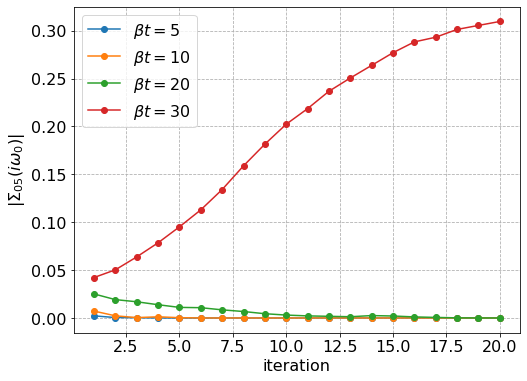

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.rc('font', size = 16)

for beta in [5,10,20,30]:
    with HDFArchive('beta_%.1f_U5.6.h5'%float(beta), 'r') as A:
        N = A['iterations']
        sigma1 = np.zeros(N)
        for i in range(N):
            sigma1[i] = np.abs(A['Sigma_orig_05-%d'%(i+1)](0))
    plt.plot(range(1,N+1), sigma1, '-o', label = r'$\beta t = %d$'%beta)
plt.xlabel('iteration')
plt.ylabel('|$\Sigma_{05}(i\omega_0)|$')
plt.grid(ls = '--')
plt.legend()
plt.show()